# Random Forests and Parameter Tuning
## Overview of Random Forest
Random forests can be used both in regression and classification problems. They are a supervised machine learning algorithm that creates a forest full of decision trees and takes a majority rules vote in the case of classification and an average in the case of regression. There are two different ensembles, bagging and boosting. Random Forest using bagging, whereas XGBoost uses the boosting ensemble. The trees are created in parallel in bagging problems, and then the majority rules vote takes place to determine the final output. Boosting creates sequential models, and the final result has the highest accuracy. In this assignment we will be focusing on using bagging within the RandomForestClassifier package.

**Please list some advantages and disadvantages to using random forest over other classification and regression machine learning techniques.**

In [7]:
# Import Statements
import sklearn
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import the data
linndat = pd.read_csv('../Final Project/linn_county_data.csv')
linndat.head()

,OBJECTID,Wetland,tpi,twi,tri,slope,fill
0,1,0,-3.615448,-0.010628,2.444646,1.050421,0.0
1,2,0,6.883240,-3.993354,8.320747,6.206928,0.0
2,3,0,-2.826141,-1.887334,5.946124,3.608583,0.0
3,4,0,-1.191956,-3.622459,3.616831,2.678447,0.0
4,5,0,-9.139526,-3.184940,2.049575,1.546121,0.0


For this dataset, our target variable is the column labeled "Wetland" and our predictor variables are "tpi", "twi", "tri", "slope", and "fill". First we will set up the same random forest created in the research that was presented on (200 estimators, maximum tree depth of 9, and the minimum samples needed for each split of 7). 

In [5]:
predictVars = ['tpi', 'tri', 'twi','slope', 'fill']
classVar = ['Wetland']
allVars = predictVars + classVar

df = pd.DataFrame(linndat, columns = allVars)
df = df.sample(frac=1)

x = df[['tpi', 'tri', 'twi', 'slope', 'fill']]
y = df['Wetland']

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=90)

In [9]:
rf = RandomForestClassifier(n_estimators=200, random_state=50, max_depth=9, min_samples_split=7)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
Prob = rf.predict_proba(X_test)
acc = accuracy_score(y_test, y_pred)
cmx = metrics.confusion_matrix(y_test, y_pred)
cmdf = pd.DataFrame(cmx, index = ['Nonwetland','Wetland'], columns = ['Nonwetland', 'Wetland'])
print("\nRandom Forest accuracy: ", acc)
print(cmdf, "\n")
print(classification_report(y_pred, y_test))


Random Forest accuracy:  0.9400749063670412
            Nonwetland  Wetland
Nonwetland         128       13
Wetland              3      123 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       131
           1       0.98      0.90      0.94       136

    accuracy                           0.94       267
   macro avg       0.94      0.94      0.94       267
weighted avg       0.94      0.94      0.94       267



**Next, play with the hyperparameter "max_depth". This controls how many layers a tree can have. Once you've played with different values, plot the accuracy for the forests with different depths, and determine where the curve begins to taper off.** 

In [31]:
x = np.arange(2, 20, 1).tolist()

totalacc = []

for num in x:
    rf = RandomForestClassifier(n_estimators=200, random_state=50, max_depth=num, min_samples_split=7)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    Prob = rf.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    cmx = metrics.confusion_matrix(y_test, y_pred)
    cmdf = pd.DataFrame(cmx, index = ['Nonwetland','Wetland'], columns = ['Nonwetland', 'Wetland'])
    
    acc = metrics.accuracy_score(y_test, y_pred)
    totalacc.append(acc)
        
    print("Maximum depth: ", i, "\n")
    print("Accuracy: ", acc, "\n")
    print(cmdf, "\n")
    print(classification_report(y_pred, y_test))
    print("\n\n\n")

Maximum depth:  [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195] 

Accuracy:  0.7940074906367042 

            Nonwetland  Wetland
Nonwetland         100       41
Wetland             14      112 

              precision    recall  f1-score   support

           0       0.71      0.88      0.78       114
           1       0.89      0.73      0.80       153

    accuracy                           0.79       267
   macro avg       0.80      0.80      0.79       267
weighted avg       0.81      0.79      0.79       267





Maximum depth:  [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195] 

Accuracy:  0.8164794007490637 

            Nonwetland  Wetland
Nonwetland         100       41
Wetland              8      118 

              precisi

Text(0, 0.5, '% Accuracy')

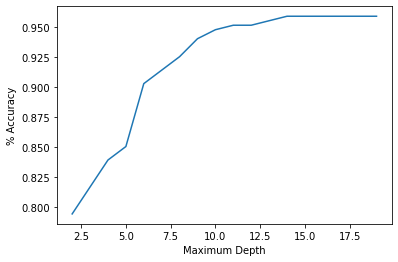

In [32]:
plt.plot(x, totalacc)
plt.xlabel('Maximum Depth')
plt.ylabel('% Accuracy')

**Now play with the minimum samples needed for a node to split and plot the accuracy for the forests.** 

In [29]:
i = np.arange(5, 200, 5).tolist()

totalacc = []

for num in i:
    rf = RandomForestClassifier(n_estimators=200, random_state=50, max_depth=9, min_samples_split=num)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    Prob = rf.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    cmx = metrics.confusion_matrix(y_test, y_pred)
    cmdf = pd.DataFrame(cmx, index = ['Nonwetland','Wetland'], columns = ['Nonwetland', 'Wetland'])
    
    acc = metrics.accuracy_score(y_test, y_pred)
    totalacc.append(acc)
        
    print("Maximum depth: ", i, "\n")
    print("Accuracy: ", acc, "\n")
    print(cmdf, "\n")
    print(classification_report(y_pred, y_test))
    print("\n\n\n")
    

Maximum depth:  [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195] 

Accuracy:  0.9400749063670412 

            Nonwetland  Wetland
Nonwetland         126       15
Wetland              1      125 

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       127
           1       0.99      0.89      0.94       140

    accuracy                           0.94       267
   macro avg       0.94      0.94      0.94       267
weighted avg       0.95      0.94      0.94       267





Maximum depth:  [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195] 

Accuracy:  0.9325842696629213 

            Nonwetland  Wetland
Nonwetland         126       15
Wetland              3      123 

              precisi

Text(0, 0.5, '% Accuracy')

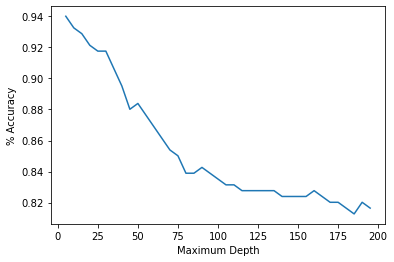

In [30]:
plt.plot(i, totalacc)
plt.xlabel('Maximum Depth')
plt.ylabel('% Accuracy')

**Using this website (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), choose another hyperparameter to play around with. Plot the accuracy of the forests after changing the new hyperparameter.**